In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [28]:
file_path = r"C:\Users\p\Downloads\statlog+german+credit+data\german.data"  
# column names based on the documentation
columns = ['existing_checking',     # Status of existing checking account
           'duration',              # Duration in months
           'credit_history',        # Credit history
           'purpose',               # Purpose of the loan
           'credit_amount',         # Amount of credit
           'savings',               # Savings account/bonds
           'employment',            # Present employment since
           'installment_rate',      # Installment rate
           'personal_status',       # Personal status and sex
           'other_debtors',         # Other debtors / guarantors
           'residence_since',       # Present residence since
           'property',              # Property
           'age',                   # Age in years
           'other_installment_plans', # Other installment plans
           'housing',               # Housing
           'existing_credits',      # Number of existing credits
           'job',                   # Job type
           'people_liable',         # Number of people being liable
           'telephone',             # Telephone
           'foreign_worker',        # Is foreign worker
           'credit_risk']           # Target variable: 1=good, 2=bad


data = pd.read_csv(file_path, sep=' ', names=columns)
# Convert target variable: 1 -> 1 (good), 2 -> 0 (bad)
data['credit_risk'] = data['credit_risk'].map({1:1, 2:0})
#print(data.head())


In [29]:
categorical_cols = ['existing_checking', 'credit_history', 'purpose', 'savings', 'employment',
                    'personal_status', 'other_debtors', 'property', 'other_installment_plans', 
                    'housing', 'job', 'telephone', 'foreign_worker']

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
X = data_encoded.drop('credit_risk', axis=1)
y = data_encoded['credit_risk']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=45)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:,1]

tree = DecisionTreeClassifier(max_depth=7, random_state=45)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:,1]

forest = RandomForestClassifier(n_estimators=100, random_state=45)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
y_prob_forest = forest.predict_proba(X_test)[:,1]


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.55      0.57      0.56        28
           1       0.83      0.82      0.83        72

    accuracy                           0.75       100
   macro avg       0.69      0.70      0.69       100
weighted avg       0.75      0.75      0.75       100

ROC-AUC: 0.826
--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.50      0.39      0.44        28
           1       0.78      0.85      0.81        72

    accuracy                           0.72       100
   macro avg       0.64      0.62      0.63       100
weighted avg       0.70      0.72      0.71       100

ROC-AUC: 0.719
--- Random Forest ---
              precision    recall  f1-score   support

           0       0.60      0.43      0.50        28
           1       0.80      0.89      0.84        72

    accuracy                           0.76       100
   macro avg       0.70   

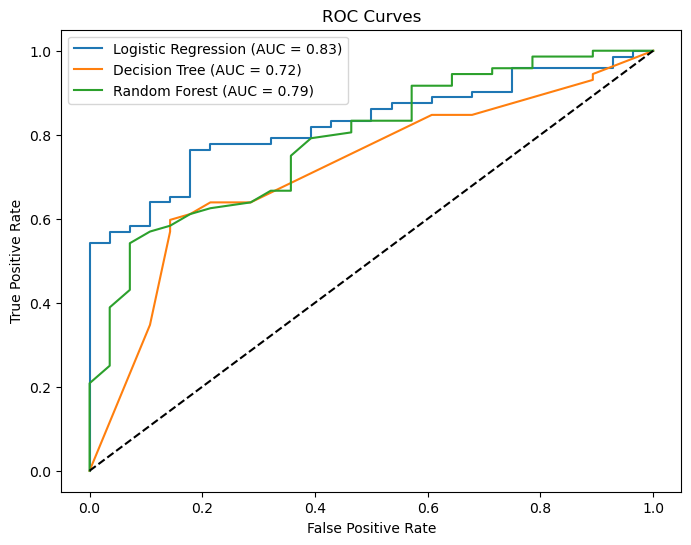

In [85]:
def evaluate_model(name, y_test, y_pred, y_prob):
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC: {roc_auc:.3f}")
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    

# ROC Curve plot
plt.figure(figsize=(8,6))
evaluate_model('Logistic Regression', y_test, y_pred_log, y_prob_log)
evaluate_model('Decision Tree', y_test, y_pred_tree, y_prob_tree)
evaluate_model('Random Forest', y_test, y_pred_forest, y_prob_forest)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

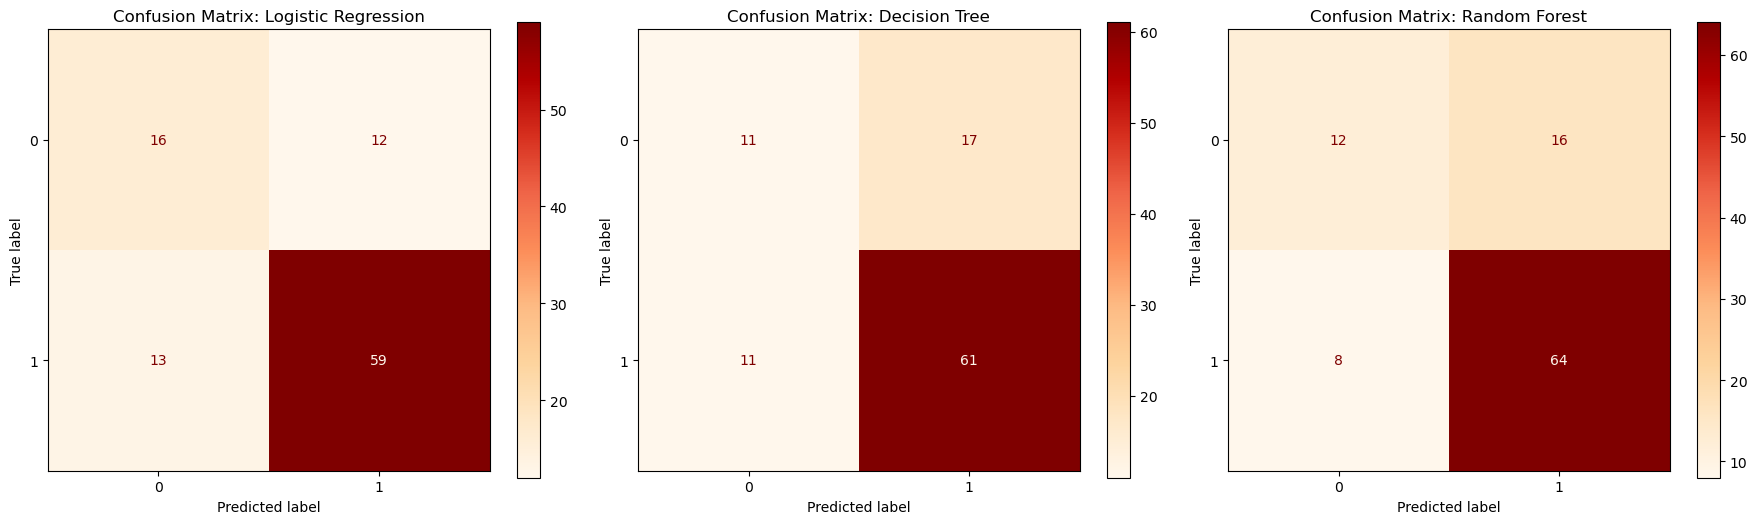

In [86]:
# Plot Confusion Matrices side by side
fig, axes = plt.subplots(1, 3, figsize=(18,5))

models = [
    ('Logistic Regression', y_pred_log),
    ('Decision Tree', y_pred_tree),
    ('Random Forest', y_pred_forest)
]

for ax, (name, y_pred) in zip(axes, models):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, colorbar=True, cmap="OrRd")
    ax.set_title(f'Confusion Matrix: {name}')
    ax.grid(False)

plt.tight_layout()
plt.show()
